In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# from sklearn.preprocessing import StandardScaler()

# Loading the dataset

In [3]:
df=pd.read_csv("C:\\Users\\owais\\Downloads\\IRIS.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


 to check for missing values in dataset:

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


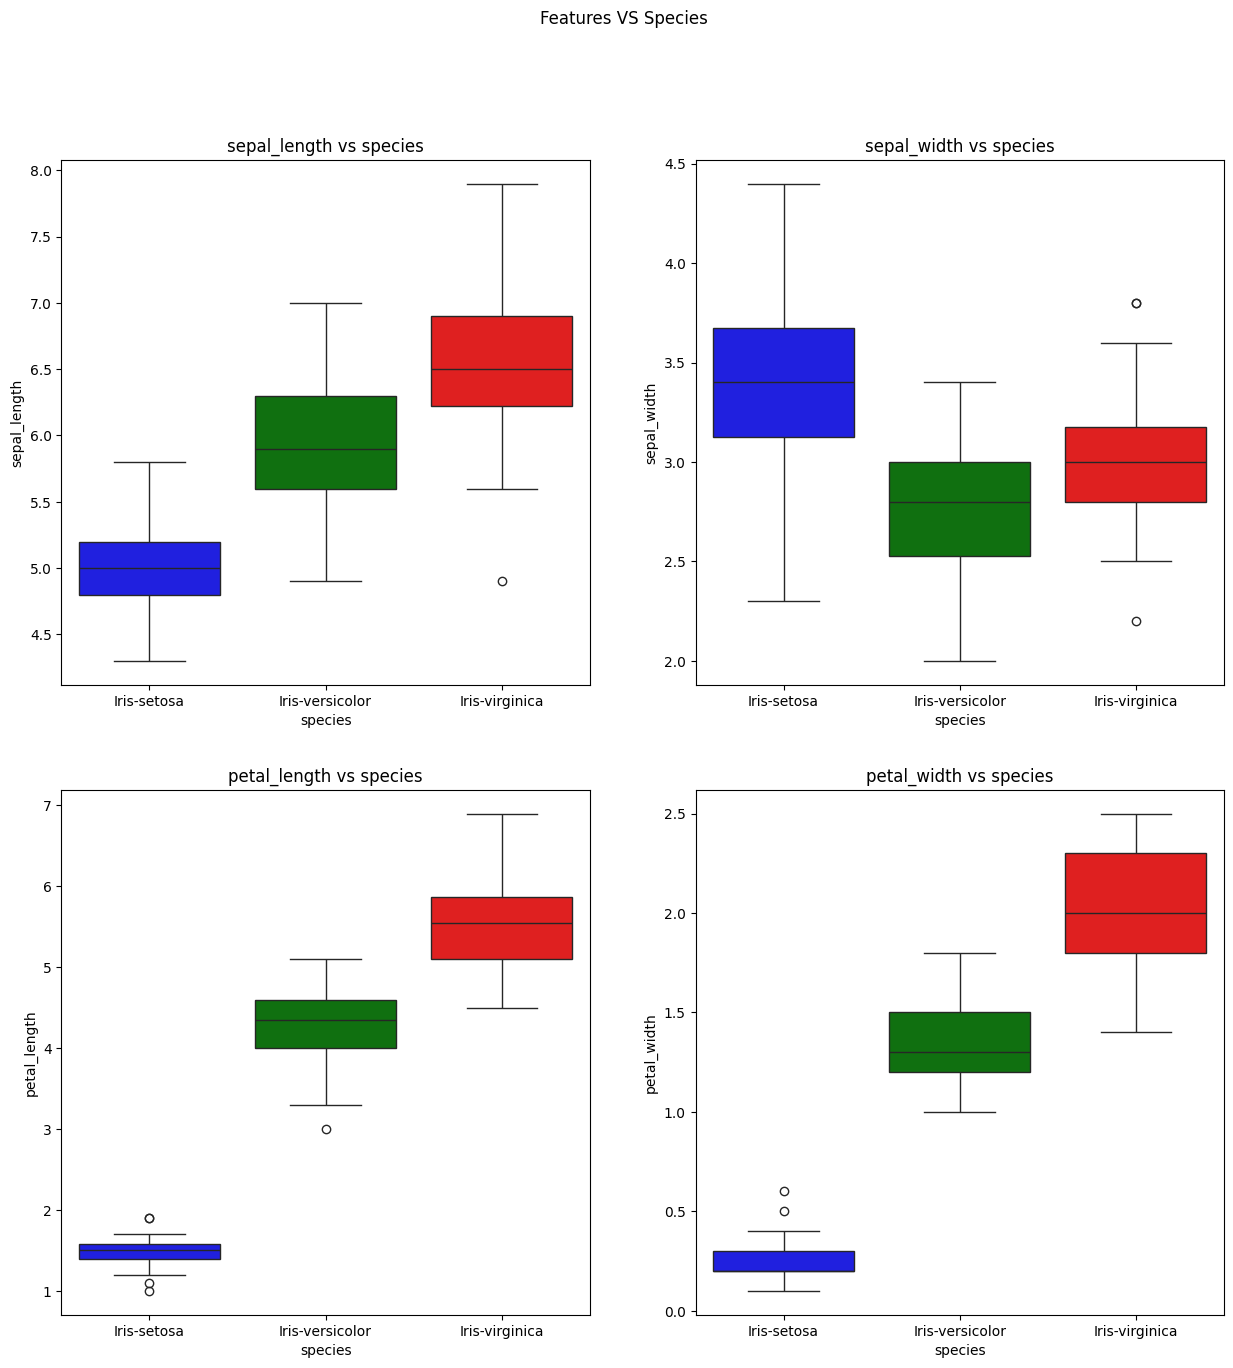

In [7]:
# Spliting the data into features (sepal length, sepal width, petal length, petal width) and target (species)
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Features VS Species")

sns.boxplot(x="species", y="sepal_length",hue="species",legend=False, data=df, ax=axs[0, 0],palette=['blue','green','red'] )
axs[0, 0].set_title("sepal_length vs species")

sns.boxplot(x="species", y="sepal_width", hue="species",legend=False,data=df, ax=axs[0, 1], palette=['blue','green','red'])
axs[0, 1].set_title("sepal_width vs species")

sns.boxplot(x="species", y="petal_length", hue="species",legend=False,data=df, ax=axs[1, 0], palette=['blue','green','red'])
axs[1, 0].set_title("petal_length vs species")

sns.boxplot(x="species", y="petal_width",hue="species",legend=False, data=df, ax=axs[1, 1], palette=['blue','green','red'])
axs[1, 1].set_title("petal_width vs species")
plt.show()

In the above subplots, we observe the presence of outliers in the feature distributions across different species"

In [8]:
#checking how many no.of data each section contains
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
print("total number of sample",len(df))

total number of sample 150


In [10]:
# removing the outliers using the standard derivation approach

In [11]:
df=df[(np.abs(df["sepal_length"]-df["sepal_length"].mean())/df["sepal_length"].std() <3)]
df=df[(np.abs(df["sepal_width"]-df["sepal_width"].mean())/df["sepal_width"].std() <3)]
df=df[(np.abs(df["petal_width"]-df["petal_width"].mean())/df["petal_width"].std() <3)]
df=df[(np.abs(df["petal_length"]-df["petal_length"].mean())/df["petal_length"].std() <3)]

In [12]:
print(" After removing outliers, total number of sample: ",len(df))

 After removing outliers, total number of sample:  149


In [14]:
#Separating our "x" variable "y" variable 
x=df.drop(["species"],axis=1)

y=df["species"]

In [15]:
# Calling the tabular data of x upto 5 index  
x[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Calling the tabular data of y upto 5 index  
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [17]:
# Dividing the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [18]:
print("total sample for training:",len(x_train))
print("total sample for testing:",len(x_test))

total sample for training: 119
total sample for testing: 30


In [19]:
# Displaying the first few rows of x_train
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
99,5.7,2.8,4.1,1.3
43,5.0,3.5,1.6,0.6
137,6.4,3.1,5.5,1.8
29,4.7,3.2,1.6,0.2


In [20]:
# Displaying the first few rows of x_test
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
146,6.3,2.5,5.0,1.9
90,5.5,2.6,4.4,1.2
55,5.7,2.8,4.5,1.3
78,6.0,2.9,4.5,1.5
85,6.0,3.4,4.5,1.6


In [21]:
# Importing DecisionTreeClassifier to classify iris species based on floral features
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_test[:5]

146     Iris-virginica
90     Iris-versicolor
55     Iris-versicolor
78     Iris-versicolor
85     Iris-versicolor
Name: species, dtype: object

In [24]:
y_test_pred=model.predict(x_test)

In [26]:
y_test_pred[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_test_pred)
print("ModelAccuracy:",accuracy)

ModelAccuracy: 0.9666666666666667


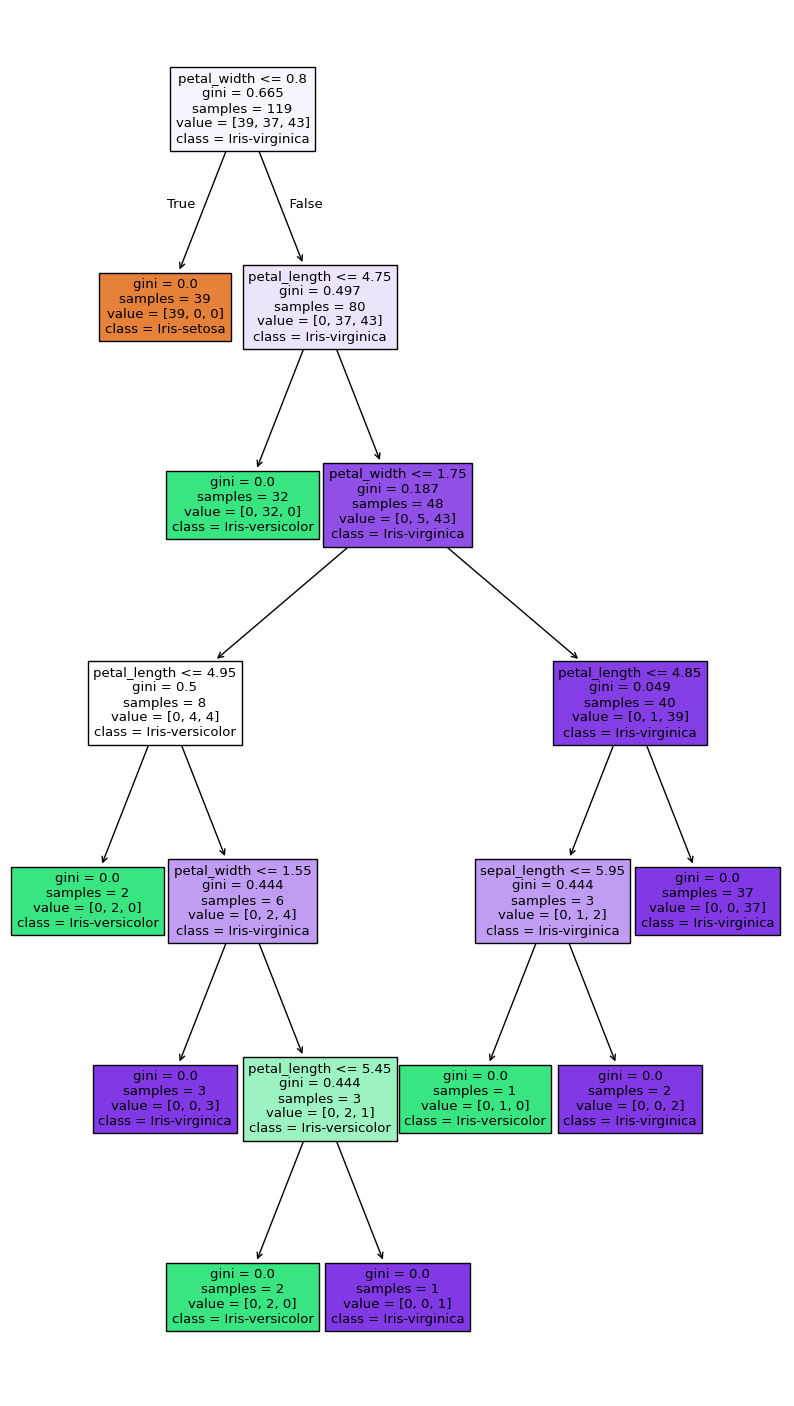

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,18))
plot_tree(model, filled=True, 
          feature_names=x_train.columns.tolist(), 
          class_names=[str(cls) for cls in model.classes_])
plt.show()

In [29]:
## importing joblib to save the model
import joblib

In [30]:
joblib.dump(model,"classifier.pkl")

['classifier.pkl']

In [31]:
Model=joblib.load("classifier.pkl")

In [ ]:
### predicting on unknown values as asked in the project with the help of above saved model

In [39]:
Model.predict([[5.0, 3.4, 1.5, 0.2]])


C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)